In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [9]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner
import omama as O

In [3]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmp6xfnvcz2GP2
Verbose mode active!


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Aerospace_segmentation_images/aeroscapes/Aerospace_Segmentation.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Aerospace_segmentation_images/aeroscapes/Aerospace_Segmentation_masks.npy')

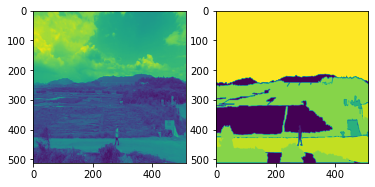

In [11]:
O.DataToNpyFiles.show_image_and_mask(images[41], masks[41])

In [12]:
len(images)

3269

In [13]:
len(masks)

3269

In [14]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [15]:
#
#
R.setup_data(images, masks, dataset_size=3269, weights=weights)

Weights OK!


In [16]:
RUNS = 5

In [17]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
3/3 [==============================] - 38s 6s/step - loss: -7.3400 - dice_coeff: 1.2869 - val_loss: -4.1882 - val_dice_coeff: 1.1921
Epoch 2/100
3/3 [==============================] - 4s 1s/step - loss: -9.8994 - dice_coeff: 1.3317 - val_loss: -3.5447 - val_dice_coeff: 1.1629
Epoch 3/100
3/3 [==============================] - 4s 1s/step - loss: -11.4662 - dice_coeff: 1.3606 - val_loss: -3.4279 - val_dice_coeff: 1.1578
Epoch 4/100
3/3 [==============================] - 4s 1s/step - loss: -12.3731 - dice_coeff: 1.3822 - val_loss: -3.4995 - val_dice_coeff: 1.1614
Epoch 5/100
3/3 [==============================] - 4s 1s/step - loss: -13.5821 - dice_coeff: 1.4060 - val_loss: -3.6012 - val_dice_coeff: 1.1663
Epoch 6/100
3/3 [==============================] - 4s 1s/step - loss: -14.2110 - dice_coeff: 1.4160 - val_loss: -3.8744 - val_dice_coeff: 1.1797
Epoch 7/100
3/3 [==============================] - 4s 1s/step - loss: -14.6148 - dice_coeff: 1.4207 - val_loss: -4.2852 

Epoch 57/100
3/3 [==============================] - 4s 1s/step - loss: -20.4983 - dice_coeff: 1.4808 - val_loss: -20.3319 - val_dice_coeff: 1.5685
Epoch 58/100
3/3 [==============================] - 4s 1s/step - loss: -20.5303 - dice_coeff: 1.4813 - val_loss: -21.1920 - val_dice_coeff: 1.5773
Epoch 59/100
3/3 [==============================] - 4s 1s/step - loss: -20.5804 - dice_coeff: 1.4828 - val_loss: -21.2217 - val_dice_coeff: 1.5669
Epoch 60/100
3/3 [==============================] - 4s 1s/step - loss: -20.5986 - dice_coeff: 1.4785 - val_loss: -20.9925 - val_dice_coeff: 1.5558
Epoch 61/100
3/3 [==============================] - 4s 1s/step - loss: -20.6329 - dice_coeff: 1.4840 - val_loss: -21.2366 - val_dice_coeff: 1.5586
Epoch 62/100
3/3 [==============================] - 4s 1s/step - loss: -20.6694 - dice_coeff: 1.4804 - val_loss: -20.7148 - val_dice_coeff: 1.5316
Epoch 63/100
3/3 [==============================] - 4s 1s/step - loss: -20.6936 - dice_coeff: 1.4807 - val_loss: -20.9

Replacing 53 from 159 !
D_relabeled_ 53
selected_ids ['499d5bc8-17f5-4d50-8c4f-3887182d593d', 'f6216ca5-33f9-4e9b-9531-7d61c47c5690', 'e7a2ae33-e6cd-43e6-bed6-ad336fa14416', '81302d34-8ea3-4325-ac2a-72f24fbc20e7', 'bfb94096-f6ab-437b-80e0-e45b05cf14d6', '15738295-45a6-4fa8-91f5-273cb96d7888', 'de1c9e74-a2bd-4c2f-a8a5-b7cce3d1d261', 'd0fc936d-816c-429a-a0f0-e105e43eed15', 'ca7ae114-f642-4f6f-aa62-127a0aee53f9', '94f4c78e-cbe6-41c1-9845-30d243c12891', '61273d37-89b8-44e9-9153-26344e48ee77', '63cabf13-7847-41ee-bbf8-164781362933', 'cdc9acf7-148f-4cb8-84a1-56f4fd6d5f61', '6ca6d0e4-062c-4b96-9a23-cc974794a5c8', '3809f95b-ea71-4d36-88a7-302157aaffb8', '094e3e78-78fc-42fa-b8d7-13c9e39d0343', '63d6c0bc-fccf-4ce7-83bc-8a05ea0b8e83', '252a3fb6-0070-493f-a63c-5a274c07b422', 'e02ea986-ca6d-4397-90ad-91445de44e45', 'f200e15f-9421-49f4-97a8-39ab1c4513d9', 'd1843876-6322-47e2-9d92-91c555e14d77', '38efdfe7-f739-4ad5-8f8a-b995ccccd5d8', 'b1d6c647-c1f8-4ac0-906d-40934f80706b', 'f4c46128-f89b-462d-8138-0

Replacing 25 from 77 !
D_relabeled_ 25
selected_ids ['eead408f-a8ff-4059-abeb-0161b20280d0', 'edbb95fd-dba6-4c3e-983a-aaebcbf53de4', '8b7dba72-0248-4e62-bc7d-0ab73f920804', 'e2d55d86-da16-4a17-8bed-0ed67c95b02a', '1b45bc7f-0716-4274-a306-0463a786d00b', '402a49c4-7c89-4f53-8ec9-5aad4d33fdb5', 'bd8b8c1a-08f2-4b57-8ce0-7c21bf57cab8', 'fbc674ef-0eaf-47ea-b77d-e26757570fcb', '5db49566-bc33-4c64-86c3-e25403520c42', '0e469105-d355-4627-9645-75092dd52607', 'e5d185de-ba67-4160-8135-7a42961c6a73', '0f58c591-1157-4e67-bcf9-1726309f3798', '852f7ffc-6d40-4c83-8f95-e7e29ffd9465', '13a4029e-52c7-44eb-97b8-e2fbb10ed93d', 'c67ef9b7-0205-44e9-bc01-f2244dfdcc85', '4d821f83-9831-4cf1-b75a-d9b7a256194e', '3f2b1e1f-6d2d-4827-8231-dbed3db5af9c', 'd8646403-8244-4b4d-8620-7370813dcd9a', 'ef2dc3d7-ea37-43d3-ac1c-139546237683', '2e8e705d-7995-48fe-ac66-a5b407f7b37b', 'e6fd6e06-ff69-40b3-a66b-54a4613c3383', 'f53e02eb-1c12-465a-85f5-4588ba9cd92c', 'a4e0e758-ed6e-4f29-85d6-857b039f4771', 'e9180def-54a0-432c-9e98-0f

4/4 [==============================] - 5s 1s/step - loss: -23.1945 - dice_coeff: 1.4787 - val_loss: -16.5532 - val_dice_coeff: 1.3175
Epoch 43/100
4/4 [==============================] - 5s 1s/step - loss: -23.2533 - dice_coeff: 1.4783 - val_loss: -12.6607 - val_dice_coeff: 1.2250
Epoch 44/100
4/4 [==============================] - 5s 1s/step - loss: -23.2114 - dice_coeff: 1.4701 - val_loss: -16.7391 - val_dice_coeff: 1.3295
Epoch 45/100
4/4 [==============================] - 5s 1s/step - loss: -23.2392 - dice_coeff: 1.4774 - val_loss: -15.7852 - val_dice_coeff: 1.3140
Model saved to /tmp/tmp6xfnvcz2GP2/unet_2.model
History saved to /tmp/tmp6xfnvcz2GP2/history_2.pickle
Testing the classifier...
31/31 [==============================] - 3s 98ms/step - loss: -12.0151 - dice_coeff: 1.2402
Testing the discriminator...
7/7 [==============================] - 0s 32ms/step - loss: 6.6163 - accuracy: 0.6735
Found 158 machine labels.
Machine labels [  0   1   2   3   4   5   7   8   9  11  13  14 

Epoch 1/100
5/5 [==============================] - 12s 3s/step - loss: -22.8513 - dice_coeff: 1.4706 - val_loss: -7.0554 - val_dice_coeff: 1.0964
Epoch 2/100
5/5 [==============================] - 5s 1s/step - loss: -23.0023 - dice_coeff: 1.4668 - val_loss: -11.8069 - val_dice_coeff: 1.1910
Epoch 3/100
5/5 [==============================] - 6s 1s/step - loss: -23.0838 - dice_coeff: 1.4732 - val_loss: -14.6610 - val_dice_coeff: 1.2723
Epoch 4/100
5/5 [==============================] - 5s 1s/step - loss: -23.1721 - dice_coeff: 1.4785 - val_loss: -16.3692 - val_dice_coeff: 1.3018
Epoch 5/100
5/5 [==============================] - 6s 1s/step - loss: -23.1965 - dice_coeff: 1.4699 - val_loss: -11.0098 - val_dice_coeff: 1.1746
Epoch 6/100
5/5 [==============================] - 5s 1s/step - loss: -23.0387 - dice_coeff: 1.4682 - val_loss: -9.2191 - val_dice_coeff: 1.1716
Epoch 7/100
5/5 [==============================] - 6s 1s/step - loss: -23.2914 - dice_coeff: 1.4739 - val_loss: -11.6944 - va

Replacing 44 from 134 !
D_relabeled_ 44
selected_ids ['79dd6530-0461-4add-8d09-f2aa61dcbcff', '14cb2b58-30d5-4cb0-a8e1-30cea5cb7307', '29409bc4-17e7-43d3-b95e-48f78d1b0e8d', '2fa99567-6bac-4f14-a9d5-5cec9cf2ca62', '3fc33e4a-0d7f-406e-bba3-97cd765f36ca', '414a24f4-1de7-48cb-8ded-13c56eeb7858', 'ed3f898b-c243-4ef2-b113-af76a33cfa6c', '5c9117f2-65ad-470b-8969-f6875b0fada5', 'f076965e-f742-46de-acd4-406ad31f68e4', 'bc91a4cb-79d6-4616-af5c-65e7633a6109', 'da336be7-9789-46e6-8736-6fe936b69ac2', '95831fe4-206d-4da9-87b5-5ec6acc1f181', '7d342bd4-516d-4546-9822-dfe51bfe4628', 'b15a2d7f-5635-465a-bb62-6121418bf344', '8b60c2bb-8e6a-4a25-a3ba-85c2752aa7d0', '90860113-b37a-477b-aeb7-b2143bc705e4', '1226cbc4-1082-4f15-862d-50d1772636de', '06177353-94d3-42bf-937b-8807e19fc256', '2e31aafe-2b1c-4f9f-be74-13b0203a7d5e', '587c8afd-bbd3-4894-aaf3-f52cd268582c', '851bdab9-6c44-435e-ba56-3f176b72b9fa', '3aea486e-e924-4ca6-ab6a-cf2dd615dfd0', 'b46af712-fef7-495d-b56d-a54fd1f15b4e', 'ee28812d-b0a0-496e-b26e-e

Epoch 32/100
6/6 [==============================] - 6s 1s/step - loss: -26.2942 - dice_coeff: 1.5063 - val_loss: -19.4602 - val_dice_coeff: 1.3682
Epoch 33/100
6/6 [==============================] - 6s 1s/step - loss: -26.3724 - dice_coeff: 1.5038 - val_loss: -17.5679 - val_dice_coeff: 1.3218
Epoch 34/100
6/6 [==============================] - 6s 1s/step - loss: -26.4195 - dice_coeff: 1.5071 - val_loss: -19.8068 - val_dice_coeff: 1.3688
Epoch 35/100
6/6 [==============================] - 6s 1s/step - loss: -26.4842 - dice_coeff: 1.5006 - val_loss: -17.6983 - val_dice_coeff: 1.3261
Epoch 36/100
6/6 [==============================] - 6s 1s/step - loss: -26.5232 - dice_coeff: 1.5081 - val_loss: -20.1966 - val_dice_coeff: 1.3760
Epoch 37/100
6/6 [==============================] - 6s 1s/step - loss: -26.6193 - dice_coeff: 1.5032 - val_loss: -13.6403 - val_dice_coeff: 1.2448
Epoch 38/100
6/6 [==============================] - 6s 1s/step - loss: -26.6561 - dice_coeff: 1.5173 - val_loss: -18.9

Epoch 88/100
6/6 [==============================] - 6s 1s/step - loss: -29.9357 - dice_coeff: 1.5379 - val_loss: -18.5486 - val_dice_coeff: 1.3409
Epoch 89/100
6/6 [==============================] - 6s 1s/step - loss: -29.7907 - dice_coeff: 1.5276 - val_loss: -16.8970 - val_dice_coeff: 1.2794
Epoch 90/100
6/6 [==============================] - 6s 1s/step - loss: -30.1091 - dice_coeff: 1.5385 - val_loss: -19.6011 - val_dice_coeff: 1.3465
Epoch 91/100
6/6 [==============================] - 6s 1s/step - loss: -30.1654 - dice_coeff: 1.5384 - val_loss: -21.5145 - val_dice_coeff: 1.3932
Epoch 92/100
6/6 [==============================] - 6s 1s/step - loss: -30.2164 - dice_coeff: 1.5296 - val_loss: -19.8073 - val_dice_coeff: 1.3674
Epoch 93/100
6/6 [==============================] - 6s 1s/step - loss: -30.2908 - dice_coeff: 1.5415 - val_loss: -26.9074 - val_dice_coeff: 1.4899
Epoch 94/100
6/6 [==============================] - 6s 1s/step - loss: -30.3426 - dice_coeff: 1.5337 - val_loss: -17.8

Replacing 52 from 157 !
D_relabeled_ 52
selected_ids ['ec0cc29e-e35a-45a7-8a5f-805563d1a919', '05f9e338-3d9d-4dda-a19a-0917422b2500', '759af12a-062f-477c-a075-e0346f79c4d1', '447414f8-b762-409d-be67-159325ce7fa7', '99e0f255-434d-4202-be4e-7d24eadc14a5', 'e74c13a6-cc29-4809-8771-d01ba3501222', '90f206da-2b96-4a9c-84dd-fa915a5fa994', '94b3bb66-7ec1-495a-970d-16559c87bf1e', '021c6815-a8ff-4913-9fe4-bce823bd45ef', 'd44aaae1-8e32-4724-b35d-51009062eeed', '1d28f288-2f20-4b9e-a50e-4866774324a6', '43cf477c-2ace-4e0e-9789-873fea5bf35d', '47f1b2d3-9158-4e3e-b80a-1d24009ba179', '067f4345-2458-4289-8f83-4be14fc2b877', '90a32044-4eb7-4107-a3ee-4d3ff84f3a15', 'd08cc43b-bda5-4c47-8225-9cac6735e374', '2f91a19e-34e9-4bb0-b652-b70ee3673806', '6b4ab17b-393a-4e1f-ad48-54248416140e', '9f12638c-d1d7-475e-a0d0-9e7d63cb38c0', '1bab80cb-7d35-4cd6-aca0-71bee3a37c0e', 'cf3cfd3a-c551-4423-8eb4-39ffa7e557b8', '33f765ad-7463-4838-9c8e-2495de4772e4', 'aff71f5c-d4c4-4708-b02d-ec3770e40a94', '18024870-1087-440b-b179-c

In [18]:
R.classifier_scores

[[-19.880935668945312, 1.4411191940307617],
 [0.619526743888855, 0.8097275495529175],
 [-12.015091896057129, 1.2402150630950928],
 [-13.005328178405762, 1.2277882099151611],
 [-17.54931640625, 1.3479435443878174]]

In [19]:
R.discriminator_scores

[[7.036961078643799, 0.6785714030265808],
 [38.36603546142578, 0.2908163368701935],
 [6.616298675537109, 0.6734693646430969],
 [8.920964241027832, 0.5714285969734192],
 [6.362941741943359, 0.6887755393981934]]

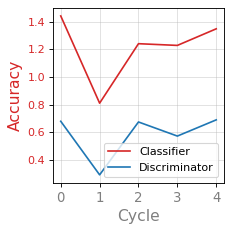

In [20]:
R.plot()